# Human emotion detection is one of computer vision tasks which I want to work on it in this notebook. 

### Human emotion detection in computer vision involves the analysis of facial expressions to recognize and understand human emotions. This area of research is essential for applications in human-computer interaction, sentiment analysis, personalized systems, and mental health assessment. Using computer vision techniques, it is possible to infer emotions such as happiness, sadness, anger, surprise, and more from facial cues.

# Step 1 | Installing and importing necessary libraries

In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.4 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2


In [2]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 57.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 130.6 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into acco

In [3]:
!pip install split-folders

In [4]:
!pip install pathlib

In [3]:
# warnings
import warnings
warnings.filterwarnings('ignore')

# frame work
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# opening and splitting images
import splitfolders
import pathlib

# visualization 
import matplotlib.pyplot as plt
import numpy as np

# Step 2 | Image preprocessing, Augmentation and visualization

In [5]:
# batch size
batch_size = 8

In [50]:
# creating train set 
train_set = keras.utils.image_dataset_from_directory(
                        directory="/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train",
                        batch_size=batch_size,
                        label_mode="categorical",
                        image_size=(224,224),
                        labels="inferred",
                        color_mode="grayscale"
)

Found 6799 files belonging to 3 classes.


In [35]:
# creating validation set 
validation_set = keras.utils.image_dataset_from_directory(
                        directory="/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/test",
                        batch_size=batch_size,
                        label_mode="categorical",
                        image_size=(224,224),
                        labels="inferred",
                        color_mode="grayscale"
)

Found 2278 files belonging to 3 classes.


In [8]:
# let's see some information about the data set
print("Number of classes : ", len(train_set.class_names))
print("class names : ", train_set.class_names)

Number of classes :  3
class names :  ['angry', 'happy', 'sad']


In [9]:
# checking the shape of images
for image in train_set.take(1):
    print(image[0].shape)

(8, 224, 224, 1)


In [10]:
# class names of images
class_names = train_set.class_names

## Rescaling 

The GrayScale channel values are in the [0, 255] range. This is not ideal for a neural network. 

In general you should seek to make your input values small.

In [11]:
# rescaling
normalization_layer = layers.Rescaling(1./255)

In [12]:
# rescaling train set
normalized_train_set = train_set.map(lambda x, y: (normalization_layer(x), y))

In [13]:
# rescaling train set
normalized_validation_set = validation_set.map(lambda x, y: (normalization_layer(x), y))

## Visualization

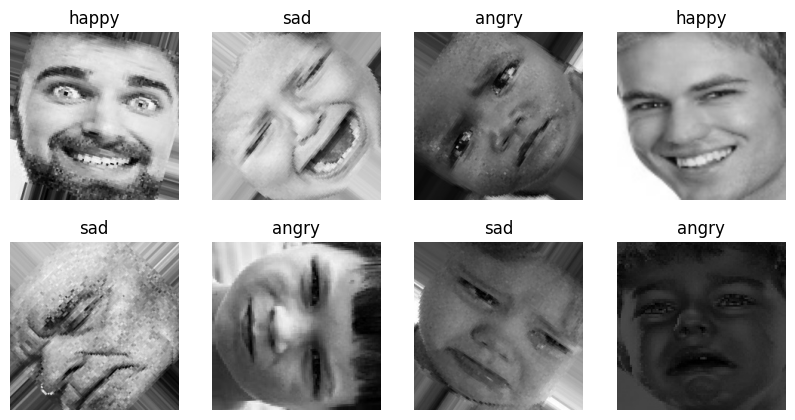

In [51]:
plt.figure(figsize=(10,5))
for img, label in train_set.take(1):
    for i in range(8):
        ax = plt.subplot(2,4,i+1)
        plt.imshow(img[i].numpy().astype("uint32"))
        plt.title(class_names[tf.argmax(label[i], axis = 0).numpy()])
        plt.axis("off")
    plt.show()

#### So there are 3 classes in this dataset which are : ['angry', 'happy', 'sad'] as you can see above.

# Step 3 | Deep Learning Architectures for Computer Vision

I'm using different CNN architectures and compare thier results. Let's begin with the first architecture.

# step 3.1 | LeNet architecture 

### Notes : 
1.LeNet proposed by Yann LeCun and others in the year 1998.

2.LeNet5 consists of seven layers.

3.Two convolutional layers, two pooling layers and three fully connected layers.

4.Also the non linear activation function is ‘tanh’.

In [29]:
# the lenet_model
lenet_model = keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=5, input_shape=[224,224,1], activation="tanh"),
    layers.AveragePooling2D(pool_size=2, strides=2),
    
    layers.Conv2D(filters=16, kernel_size=5, activation="tanh"),
    layers.AveragePooling2D(pool_size=2, strides=2),
    
    layers.Conv2D(filters=120, kernel_size=5, activation="tanh"),

    layers.Flatten(),
    layers.Dense(units=84, activation="tanh"),
    layers.Dense(units=3, activation="softmax")

])

In [30]:
# summary of the model
lenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 6)    │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 110, 110, 6)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 53, 53, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 49, 49, 120)    │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288120)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │    24,202,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,253,111 (92.52 MB)

 Trainable params: 24,253,111 (92.52 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Training the model on the original data
optm = keras.optimizers.Adam(1e-3)
lenet_model.compile(optimizer=optm, loss="categorical_crossentropy", metrics=["accuracy"])
history1 = lenet_model.fit(x=train_set, validation_data = validation_set, epochs=20)

Epoch 1/20


I0000 00:00:1723313793.719223   32399 service.cc:146] XLA service 0x7cec44010900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723313793.719257   32399 service.cc:154]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 16/850 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2289 - loss: 4.9281

I0000 00:00:1723313796.209425   32399 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


850/850 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.3822 - loss: 1.9646 - val_accuracy: 0.4416 - val_loss: 1.0639
Epoch 2/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4345 - loss: 1.0683 - val_accuracy: 0.4416 - val_loss: 1.0692
Epoch 3/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4321 - loss: 1.0703 - val_accuracy: 0.4416 - val_loss: 1.0717
Epoch 4/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4262 - loss: 1.0719 - val_accuracy: 0.4416 - val_loss: 1.0723
Epoch 5/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4269 - loss: 1.0720 - val_accuracy: 0.4416 - val_loss: 1.0686
Epoch 6/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4298 - loss: 1.0723 - val_accuracy: 0.4416 - val_loss: 1.0723
Epoch 7/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4392 - loss: 1.0723 - val_accuracy: 0.4416 - val_loss: 1.0769
Epoch 8/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4240 - loss: 1.0758 - val_accurac

In [ ]:
'''# Training the model on the augmented data
optm = keras.optimizers.Adam(1e-3)
lenet_model.compile(optimizer=optm, loss="categorical_crossentropy", metrics=["accuracy"])
history1 = lenet_model.fit(x=combined_train_dataset, validation_data = combined_val_dataset, epochs=20)'''

Epoch 1/20


# step 3.2 | AlexNet architecture

### Notes:
1.It includes convolutional layers and fully connected layers.

2.AlexNet uses a dual pipeline structure to accommodate the use of two GPUs during training.

3.And it uses ReLU as an activation function.

In [41]:
# the AlexNet_model
AlexNet_model = keras.Sequential([
    layers.Conv2D(96, 11, strides=4, activation='relu', input_shape=[224,224,1]),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Conv2D(256, 5, activation='relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Conv2D(384, 3, activation='relu'),
    layers.Conv2D(384, 3, activation='relu'),
    
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [42]:
# summary of the model
AlexNet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 54, 54, 96)     │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,570,243 (82.28 MB)

 Trainable params: 21,570,243 (82.28 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Training the model
AlexNet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history1 = AlexNet_model.fit(x=train_set, validation_data = validation_set, epochs=20)

Epoch 1/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.4600 - loss: 6.5066 - val_accuracy: 0.4833 - val_loss: 1.0567
Epoch 2/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4666 - loss: 1.0583 - val_accuracy: 0.4903 - val_loss: 1.0547
Epoch 3/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4571 - loss: 1.0707 - val_accuracy: 0.4416 - val_loss: 1.0640
Epoch 4/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4382 - loss: 1.0643 - val_accuracy: 0.4416 - val_loss: 1.0640
Epoch 5/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4361 - loss: 1.0647 - val_accuracy: 0.4416 - val_loss: 1.0636
Epoch 6/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4364 - loss: 1.0643 - val_accuracy: 0.4416 - val_loss: 1.0638
Epoch 7/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4358 - loss: 1.0649 - val_accuracy: 0.4416 - val_loss: 1.0633
Epoch 8/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4356 - loss: 1.0642 - val_ac

# step 3.3 | ResNet architecture


### Notes:
1.The Resudual block has 2 conv layers with batchNormalization and "relu" aactivation.

2.The first layer of a ResNet is a conv2D with 64filters and 7kernel_size with 2strides.


In [44]:
# The Residual Block
def ResidualBlock(input_tensor, filters, kernel_size):
    x = layers.Conv2D(filters, kernel_size, padding="same")(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(filters, kernel_size, padding="same")(x)
    x = layers.BatchNormalization()(x)
    
    # adding skip connection
    x = layers.Add()([x, input_tensor])
    x = layers.Activation("relu")(x)
    
    return x

In [45]:
# ResNet model
def ResNet(input_shape, n_classes):
    # the first cov layer is same for different ResNet architecture
    input_tensor = layers.Input(shape=input_shape)
    
    # first layer
    x = layers.Conv2D(64, 7, 2, padding="same")(inputs=input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(3, 2, padding="same")(x)

    for _ in range(3):
        x = ResidualBlock(x, 64, 3) 
        
    x = layers.Conv2D(128, 3, strides=2, padding='same')(x) 
    for _ in range(3): 
        x = ResidualBlock(x, 128, 3) 
        
    x = layers.Conv2D(256, 3, strides=2, padding='same')(x) 
    for _ in range(3): 
        x = ResidualBlock(x, 256, 3) 
        
        
    x = layers.GlobalAveragePooling2D()(x) 
    x = layers.Dense(num_classes, activation='softmax')(x) 
    
    model = tf.keras.Model(inputs=input_tensor, outputs=x) 
    
    return model

In [47]:
# Instantiate the ResNet model 
input_shape = (224, 224, 1) 
num_classes = 3 
resnet_model = ResNet(input_shape, num_classes) 

In [48]:
# resnet_model summary
resnet_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 112, 112,  │      3,200 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_34[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 56, 56,    │          0 │ activation_19[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 56, 56,    │     36,928 │ max_pooling2d_7[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_35[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_20[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_36[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_21       │ (None, 56, 56,    │          0 │ add_9[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_21[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_37[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_22       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_22[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_38[0][0] 

 Total params: 5,031,555 (19.19 MB)

 Trainable params: 5,026,051 (19.17 MB)

 Non-trainable params: 5,504 (21.50 KB)

In [49]:
# Training the model
resnet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history3 = resnet_model.fit(x=train_set, validation_data = validation_set, epochs=20)

Epoch 1/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 51s 37ms/step - accuracy: 0.4322 - loss: 1.2430 - val_accuracy: 0.4355 - val_loss: 1.4104
Epoch 2/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4411 - loss: 1.0764 - val_accuracy: 0.4421 - val_loss: 1.1002
Epoch 3/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4623 - loss: 1.0547 - val_accuracy: 0.4394 - val_loss: 1.0759
Epoch 4/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4741 - loss: 1.0349 - val_accuracy: 0.4157 - val_loss: 1.1423
Epoch 5/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.5093 - loss: 1.0126 - val_accuracy: 0.4561 - val_loss: 1.1891
Epoch 6/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.5184 - loss: 0.9968 - val_accuracy: 0.5259 - val_loss: 1.0093
Epoch 7/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.5276 - loss: 0.9752 - val_accuracy: 0.5123 - val_loss: 0.9924
Epoch 8/20
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.5781 - loss: 0.8867 - 

# Step 4 | Conclusion

As you can see the ResNet model is working better than the first two models. The accuracy is higher and the loss is lower.